In [14]:
# read csv file and clean the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# read csv file
def read_csv(file_path):
    data = pd.read_csv(file_path)
    return data

In [15]:
# channel A - type T thermocouple
# channel B - Nickel Copper thermocouple
# heating from -200 to above 0 C
messung_1 = read_csv('data_combined/messung_1.csv')

# channel A - type T thermocouple
# channel B - Nickel Copper thermocouple
# cooling from 100 to = C
messung_2 = read_csv('data_combined/messung_2.csv')

# channel A - Copper Graphene thermocouple
messung_3 = read_csv('data_combined/messung_3.csv')

# channel A - Copper Graphite thermocouple
messung_4 = read_csv('data_combined/messung_4.csv')

# channel A - Graphene Graphite thermocouple
messung_5 = read_csv('data_combined/messung_5.csv')

In [80]:
# plot the data
def plot_data(data, title, label_a=False, label_b=False, show=False):
    if label_a != False:
        plt.plot(data['Time'], data['Channel A'], label=label_a)
    if label_b != False:
        plt.plot(data['Time'], data['Channel B'], label=label_b)
        
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title(title)
    plt.legend()
    if show:
        plt.show()

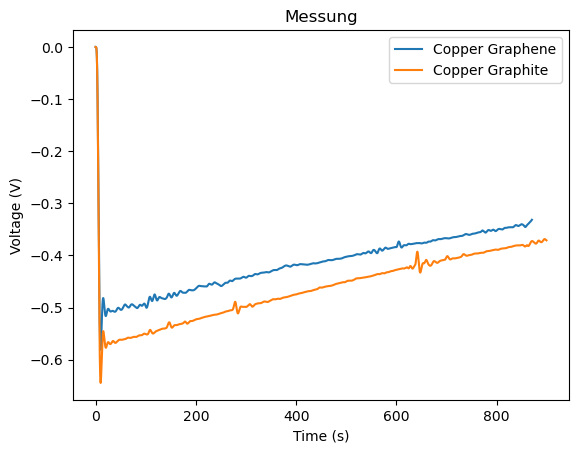

In [81]:
# plot messung_1
# smooth the datasets by removing all frequencies above 0.1 Hz, use the butterworth filter
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def smooth_data(data, cutoff, fs, order=5):
    data_smoothed = data.copy()
    data_smoothed['Channel A'] = butter_lowpass_filter(data['Channel A'], cutoff, fs, order)
    data_smoothed['Channel B'] = butter_lowpass_filter(data['Channel B'], cutoff, fs, order)
    return data_smoothed

# apply the filter
cutoff = 0.1
fs = 1.0 / messung_1['Time'][1]
messung_1_smoothed = smooth_data(messung_1, cutoff, fs)
messung_2_smoothed = smooth_data(messung_2, cutoff, fs)
messung_3_smoothed = smooth_data(messung_3, cutoff, fs)
messung_4_smoothed = smooth_data(messung_4, cutoff, fs)
messung_5_smoothed = smooth_data(messung_5, cutoff, fs)


plot_data(messung_3_smoothed, 'Messung', label_a="Copper Graphene")
plot_data(messung_5_smoothed, 'Messung', label_a="Copper Graphite")

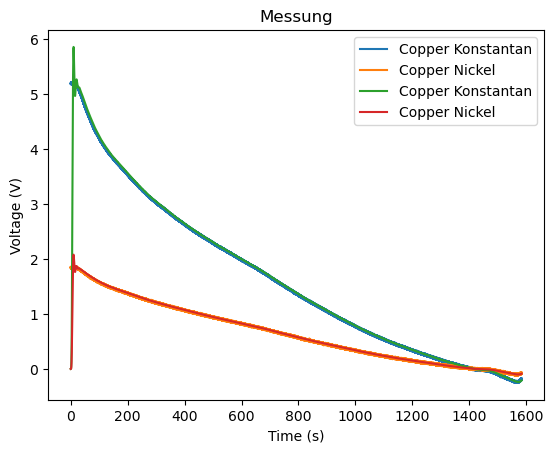

In [83]:
plot_data(messung_1, 'Messung', label_a="Copper Konstantan", label_b="Copper Nickel")
plot_data(messung_1_smoothed, 'Messung', label_a="Copper Konstantan", label_b="Copper Nickel")

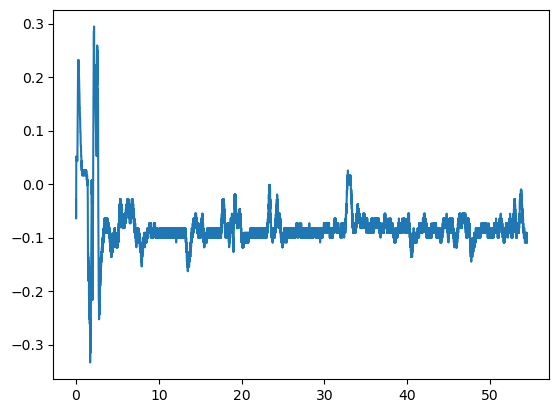

In [61]:
messung_4 = pd.read_csv('data_raw/Messung_Vier/Messung_Vier_09.csv', decimal=',', sep=';', skiprows=[1])
#plot messung_2 time
plt.plot(np.array(messung_4['Time']), np.array(messung_4['Channel A']), label='Channel A')